In [1]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [2]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=128
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [4]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)
x_test.shape

(43, 128, 128, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [6]:
input_shape=(img_si,img_si,3)

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model1.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation = 'softmax'))

In [7]:
input_shape=(img_si,img_si,3)

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'tanh'))
model4.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'tanh'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), padding='same', activation = 'tanh'))
model4.add(Conv2D(64, (3, 3), padding='same', activation = 'tanh'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(256, activation = 'tanh'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation = 'softmax'))

In [8]:
input_shape=(img_si,img_si,3)

model16 = Sequential()
model16.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'sigmoid'))
model16.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'sigmoid'))
model16.add(Dropout(0.25))
model16.add(MaxPooling2D(pool_size=(2, 2)))

model16.add(Conv2D(64, (3, 3), padding='same', activation = 'sigmoid'))
model16.add(Conv2D(64, (3, 3), padding='same', activation = 'sigmoid'))
model16.add(Dropout(0.25))
model16.add(MaxPooling2D(pool_size=(2, 2)))

model16.add(Flatten())
model16.add(Dense(256, activation = 'sigmoid'))
model16.add(Dropout(0.5))
model16.add(Dense(7, activation = 'softmax'))

In [9]:
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [10]:
model4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
model16.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
from keras import callbacks
filename1='model1_train_new.csv'
filename4='model4_train_new.csv'
filename16='model16_train_new.csv'
filename32='model32_train_new.csv'
filename64='model64_train_new.csv'

filepath1 = os.path.join('checkpoint', filename1)
filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath32 = os.path.join('checkpoint', filename32)
filepath64 = os.path.join('checkpoint', filename64)

checkpoint1 = callbacks.ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint32 = callbacks.ModelCheckpoint(filepath32, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')


In [13]:
hist1 = model1.fit(X_train, y_train, batch_size=7, epochs=30, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint1)

Epoch 1/30
25/25 [==============================] - 34s 735ms/step - loss: 2.5602 - accuracy: 0.2365 - val_loss: 1.9474 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 2/30
25/25 [==============================] - 18s 708ms/step - loss: 1.9455 - accuracy: 0.0993 - val_loss: 1.9469 - val_accuracy: 0.0698

Epoch 00002: val_accuracy did not improve from 0.09302
Epoch 3/30
25/25 [==============================] - 18s 707ms/step - loss: 1.9175 - accuracy: 0.2024 - val_loss: 1.8972 - val_accuracy: 0.2791

Epoch 00003: val_accuracy improved from 0.09302 to 0.27907, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 4/30
25/25 [==============================] - 18s 713ms/step - loss: 1.8319 - accuracy: 0.2952 - val_loss: 1.8054 - val_accuracy: 0.3023

Epoch 00

In [14]:
hist4 = model4.fit(X_train, y_train, batch_size=7, epochs=30, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint4)

Epoch 1/30
25/25 [==============================] - 20s 747ms/step - loss: 5.0397 - accuracy: 0.1445 - val_loss: 2.5167 - val_accuracy: 0.2326

Epoch 00001: val_accuracy improved from -inf to 0.23256, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 2/30
25/25 [==============================] - 18s 729ms/step - loss: 3.0928 - accuracy: 0.1656 - val_loss: 1.9504 - val_accuracy: 0.2093

Epoch 00002: val_accuracy did not improve from 0.23256
Epoch 3/30
25/25 [==============================] - 18s 720ms/step - loss: 2.5744 - accuracy: 0.1283 - val_loss: 2.0209 - val_accuracy: 0.0930

Epoch 00003: val_accuracy did not improve from 0.23256
Epoch 4/30
25/25 [==============================] - 18s 719ms/step - loss: 2.5895 - accuracy: 0.1358 - val_loss: 2.0503 - val_accuracy: 0.0930

Epoch 00004: val_accuracy did not improve from 0.23256
Epoch 5/30
25/25 [==============================] - 18s 717ms/step - loss: 2.492

In [15]:
hist16 = model16.fit(X_train, y_train, batch_size=7, epochs=30, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint16)

Epoch 1/30
25/25 [==============================] - 20s 741ms/step - loss: 3.4755 - accuracy: 0.0872 - val_loss: 2.8731 - val_accuracy: 0.2093

Epoch 00001: val_accuracy improved from -inf to 0.20930, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 2/30
25/25 [==============================] - 18s 729ms/step - loss: 2.7852 - accuracy: 0.1278 - val_loss: 2.4952 - val_accuracy: 0.2093

Epoch 00002: val_accuracy did not improve from 0.20930
Epoch 3/30
25/25 [==============================] - 18s 723ms/step - loss: 2.4055 - accuracy: 0.1449 - val_loss: 2.2354 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.20930
Epoch 4/30
25/25 [==============================] - 18s 726ms/step - loss: 2.3340 - accuracy: 0.1266 - val_loss: 2.0416 - val_accuracy: 0.2093

Epoch 00004: val_accuracy did not improve from 0.20930
Epoch 5/30
25/25 [==============================] - 18s 727ms/step - loss: 2.2

<Figure size 432x288 with 0 Axes>

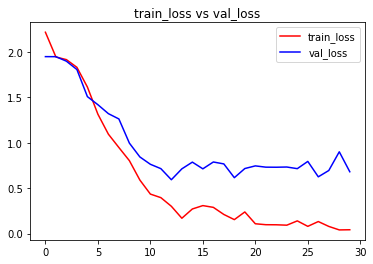

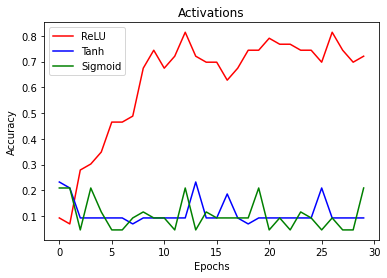

<Figure size 432x288 with 0 Axes>

In [17]:
train_loss=hist1.history['loss']
val_loss=hist1.history['val_loss']
train_acc=hist1.history['accuracy']

val_acc=hist1.history['val_accuracy']
bval_acc=hist4.history['val_accuracy']
cval_acc=hist16.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('train_loss vs val_loss')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,val_acc,'r', label='ReLU')
pyplot.plot(epochs,bval_acc,'b', label='Tanh')
pyplot.plot(epochs,cval_acc,'g', label='Sigmoid')
pyplot.title('Activations')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()